In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from nn_robust_attacks.setup_mnist import MNIST, MNISTModel

Using TensorFlow backend.


In [2]:
sess = tf.Session(config=tf.ConfigProto())
K.set_session(sess)

data = MNIST()

# CNN Model for MNIST 
class MNIST_Model:
    def __init__(self, session=None):
        self.num_channels = 1
        self.image_size = 28
        self.num_labels = 10

        model = Sequential()

        model.add(Conv2D(32, (3, 3),
                         input_shape=(28, 28, 1)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(10))

        self.model = model

    def predict(self, data):
        return self.model(data)

In [3]:
# Training variables
num_epochs = 10
batch_size = 128
train_temp = 1

training = False

# Model Training

In [4]:
from keras.models import load_model, Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD

def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                   logits=predicted/train_temp)

# Train first model 
modelname = "models/trained_model1"
model1 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model1.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model1.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model1.model.save(modelname)
else:
    model1.model = load_model(modelname, custom_objects={'fn':fn})
        
model1.model.summary()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
___________________________________________________________

In [5]:
# Train second model 
modelname = "models/trained_model2"
model2 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model2.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model2.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model2.model.save(modelname)
else:
    model2.model = load_model(modelname, custom_objects={'fn':fn})
    
model2.model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_43 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_44 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_45 (Activation)   (None, 10, 10, 64)       

In [6]:
# Train third model 
modelname = "models/trained_model3"
model3 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model3.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model3.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model3.model.save(modelname)   
else:
    model3.model = load_model(modelname, custom_objects={'fn':fn})
    
model3.model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_38 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_39 (Activation)   (None, 10, 10, 64)       

In [7]:
# Train fourth model 
modelname = "models/trained_model4"
model4 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model4.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model4.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model4.model.save(modelname)
else:
    model4.model = load_model(modelname, custom_objects={'fn':fn})
    
model4.model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_43 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_44 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_45 (Activation)   (None, 10, 10, 64)       

In [8]:
# Train fifth model 
modelname = "models/trained_model5"
model5 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model5.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model5.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model5.model.save(modelname)
else:
    model5.model = load_model(modelname, custom_objects={'fn':fn})
    
model5.model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_27 (Activation)   (None, 10, 10, 64)       

# Preprocess / Setup

In [9]:
from keras.datasets import mnist as data_keras
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = data_keras.load_data()
x_train = x_train[...,np.newaxis] /255.0
x_test = x_test[...,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# Model performances
scores = model1.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model2.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model3.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model4.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model5.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

10000/10000 [==============================] - 2s 178us/step
loss=0.060424025029380574, accuracy=0.9833999872207642
10000/10000 [==============================] - 2s 193us/step
loss=0.060767219057303735, accuracy=0.9829999804496765
10000/10000 [==============================] - 2s 188us/step
loss=0.1604284207782708, accuracy=0.9513999819755554
10000/10000 [==============================] - 2s 168us/step
loss=0.06374289788251045, accuracy=0.979200005531311
10000/10000 [==============================] - 2s 172us/step
loss=0.1024473569555208, accuracy=0.9670000076293945


In [11]:
plt.set_cmap('Greys_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
true_label = 0
num_img = 25

targets = np.array([to_categorical(9)])
for i in range(0, num_img - 1):
    targets = np.vstack([targets, np.array(to_categorical(9))])
    
inputs = np.load('inputs_0_new.csv.npy')

In [13]:
print(len(inputs))

25


# Helper Functions

In [14]:
def plot_adversarial(inputs, adv):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(inputs[0][:,:,0])
    ax2.imshow(adv[0][:,:,0])
    ax3.imshow(adv[0][:,:,0] - inputs[0][:,:,0])

In [15]:
from numpy import savetxt

def save_results(inputs, adv, targets, subset_attacked):
    np.save('four_subset_data/inputs_att_new_' + '_' + subset_attacked + '.csv', inputs)
    np.save('four_subset_data/adv_att_new_' + subset_attacked + '.csv', adv)
    np.save('four_subset_data/targets_att_new_' + subset_attacked + '.csv', targets)  

In [16]:
def get_label_confidence(image, model):
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    pr = pr / np.sum(pr)
    image_class = model.predict_classes(image)
    return image_class[0], max(max(pr))

In [17]:
def attack_evaluation(num_img, adv, num_models):
    l = []
    for i in range(0, num_img):
        print(i)
        if num_models == 1:
            res = get_label_confidence(adv[i][np.newaxis, ...], model1.model)
        if num_models > 1: 
            res = [get_label_confidence(adv[i][np.newaxis, ...], model1.model), get_label_confidence(adv[i][np.newaxis, ...], model2.model), get_label_confidence(adv[i][np.newaxis, ...], model3.model), get_label_confidence(adv[i][np.newaxis, ...], model4.model)]
        print(res)
        l.append(res)
    return l

In [18]:
def size_of_attack(adv, inputs, num_img):
    perturb = adv - inputs
    perturb_mean =  np.sum(perturb) / num_img 
    perturb_std = np.std(np.array([sum(x) for x in perturb]))
    print('Mean', perturb_mean)
    print('Standard Deviation', perturb_std)

In [19]:
def transferability(num_img, adv):
    for i in range(0, num_img):
        print(i)
        print('Model 5', get_label_confidence(adv[i][np.newaxis, ...], model5.model))

In [20]:
def check_correct(subset, num_img, adv, num_models, target_label='9', true_label='0'):
    l = attack_evaluation(num_img, adv, num_models)
    correct = []
    for res in l:
        if subset == '1':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == true_label and res[3][0] == true_label else False
        elif subset == '2':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == true_label else False
        elif subset == '3':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '4':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '12':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == true_label else False
        elif subset == '13':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '14':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '23':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '24':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '34':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == target_label else False
        elif subset == '123':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == true_label else False
        elif subset == '124':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == true_label and res[3][0] == target_label else False
        elif subset == '134':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == target_label and res[3][0] == target_label else False
        elif subset == '234':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == target_label else False
        elif subset == '1234':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == target_label and res[3][0] == target_label else False
            
        if output:
            correct.append(l.index(res))
    return correct

In [21]:
def print_results(num_img, adv, num_models, inputs, subset):
    print(check_correct(subset, num_img, adv, num_models))
    print(size_of_attack(adv, inputs, num_img))
    print(transferability(num_img, adv))

# Baseline (Attacking One Model)

In [21]:
from nn_robust_attacks.l2_attack import CarliniL2

subset = 'baseline'
adv = CarliniL2(sess, model1).attack(inputs, targets)
save_results(inputs, adv, targets, subset)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [25]:
print_results(num_img, adv, 1, inputs)

0
Model 1 (9, 0.34355834)
1
Model 1 (9, 0.522656)
2
Model 1 (9, 0.26367378)
3
Model 1 (9, 0.4991756)
4
Model 1 (9, 0.3491209)
5
Model 1 (9, 0.52347225)
6
Model 1 (9, 0.35858643)
7
Model 1 (9, 0.48546952)
8
Model 1 (9, 0.5150928)
9
Model 1 (9, 0.51759684)
10
Model 1 (9, 0.34590906)
11
Model 1 (9, 0.50831795)
12
Model 1 (9, 0.41006926)
13
Model 1 (9, 0.50873554)
14
Model 1 (9, 0.52317804)
15
Model 1 (9, 0.35557133)
16
Model 1 (9, 0.441872)
17
Model 1 (9, 0.52496725)
18
Model 1 (9, 0.4993671)
19
Model 1 (9, 0.5243834)
20
Model 1 (9, 0.4811944)
21
Model 1 (9, 0.5125779)
22
Model 1 (9, 0.49178377)
23
Model 1 (9, 0.33482033)
24
Model 1 (9, 0.3412965)
None
Mean 3.4063031005859377
Standard Deviation 0.7661112
None
0
Model 5 (0, 0.8945568)
1
Model 5 (0, 0.87031597)
2
Model 5 (0, 0.76780343)
3
Model 5 (0, 0.8625749)
4
Model 5 (0, 0.90164965)
5
Model 5 (0, 0.7483974)
6
Model 5 (0, 0.99590695)
7
Model 5 (0, 0.7573919)
8
Model 5 (0, 0.9833986)
9
Model 5 (0, 0.89756876)
10
Model 5 (0, 0.9892907)
11


# Four Model Attack (1 Target)

## D : (A, D, D, D)

In [26]:
from nn_robust_attacks.l2_attack_quad_single_triple import CarliniL2

subset = '1_new'
adv = CarliniL2(sess, model1, model2, model3, model4, attack=False).attack(inputs, targets)
save_results(inputs, adv, targets, subset)

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [27]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (9, 0.27590424)
Model 2 (0, 0.9967751)
Model 3 (0, 0.9998006)
Model 4 (0, 0.99926555)
1
Model 1 (9, 0.33752385)
Model 2 (0, 0.9104764)
Model 3 (0, 0.95686793)
Model 4 (0, 0.8422328)
2
Model 1 (9, 0.26266962)
Model 2 (0, 0.6302219)
Model 3 (0, 0.9990531)
Model 4 (0, 0.95547074)
3
Model 1 (9, 0.34940556)
Model 2 (0, 0.9947384)
Model 3 (0, 0.7006275)
Model 4 (0, 0.9990234)
4
Model 1 (9, 0.21176438)
Model 2 (0, 0.91555285)
Model 3 (0, 0.9895832)
Model 4 (0, 0.67470944)
5
Model 1 (9, 0.47502935)
Model 2 (0, 0.9687023)
Model 3 (0, 0.86059815)
Model 4 (0, 0.98777896)
6
Model 1 (9, 0.3330125)
Model 2 (0, 0.9864701)
Model 3 (0, 0.99986494)
Model 4 (0, 0.9868802)
7
Model 1 (9, 0.22216523)
Model 2 (0, 0.9793478)
Model 3 (0, 0.99175847)
Model 4 (0, 0.664136)
8
Model 1 (9, 0.310951)
Model 2 (0, 0.89960015)
Model 3 (0, 0.96902186)
Model 4 (0, 0.76678663)
9
Model 1 (9, 0.25788593)
Model 2 (0, 0.995293)
Model 3 (0, 0.65728766)
Model 4 (0, 0.99212515)
10
Model 1 (9, 0.26711267)
Model 2 (0, 0.

In [28]:
subset = '2_new'
adv = CarliniL2(sess, model2, model1, model3, model4, attack=False).attack(inputs, targets)
save_results(inputs, adv, targets, subset)

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [29]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (0, 0.7683962)
Model 2 (9, 0.22339876)
Model 3 (0, 0.9998498)
Model 4 (0, 0.9976571)
1
Model 1 (0, 0.94855344)
Model 2 (9, 0.22946896)
Model 3 (0, 0.9881518)
Model 4 (0, 0.81572163)
2
Model 1 (0, 0.86579156)
Model 2 (9, 0.2664867)
Model 3 (0, 0.9993308)
Model 4 (0, 0.97005045)
3
Model 1 (0, 0.99471635)
Model 2 (9, 0.48801625)
Model 3 (0, 0.9461386)
Model 4 (0, 0.99112535)
4
Model 1 (0, 0.99314946)
Model 2 (9, 0.31413817)
Model 3 (0, 0.999524)
Model 4 (0, 0.9581921)
5
Model 1 (0, 0.99859494)
Model 2 (9, 0.2813038)
Model 3 (0, 0.9023502)
Model 4 (0, 0.82261276)
6
Model 1 (0, 0.8797486)
Model 2 (9, 0.32612374)
Model 3 (0, 0.9954264)
Model 4 (0, 0.99398327)
7
Model 1 (0, 0.9663481)
Model 2 (9, 0.43799806)
Model 3 (0, 0.98621696)
Model 4 (0, 0.981506)
8
Model 1 (0, 0.9997971)
Model 2 (9, 0.34358448)
Model 3 (0, 0.9999149)
Model 4 (0, 0.97467613)
9
Model 1 (0, 0.96499705)
Model 2 (9, 0.36876652)
Model 3 (0, 0.8053558)
Model 4 (0, 0.5556243)
10
Model 1 (0, 0.9153967)
Model 2 (9, 0.2

In [30]:
subset = '3_new'
adv = CarliniL2(sess, model3, model1, model2, model4, attack=False).attack(inputs, targets)
save_results(inputs, adv, targets, subset)

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [ ]:
print_results(num_img, adv, 4, inputs)

In [32]:
subset = '4_new'
adv = CarliniL2(sess, model4, model1, model2, model3, attack=False).attack(inputs, targets)
save_results(inputs, adv, targets, subset)

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [33]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (0, 0.51766336)
Model 2 (0, 0.98225385)
Model 3 (0, 0.9990652)
Model 4 (9, 0.50182265)
1
Model 1 (0, 0.9699904)
Model 2 (0, 0.99874127)
Model 3 (0, 0.99691117)
Model 4 (9, 0.5259788)
2
Model 1 (5, 0.5969311)
Model 2 (5, 0.7084046)
Model 3 (0, 0.95344085)
Model 4 (9, 0.2736826)
3
Model 1 (0, 0.99986464)
Model 2 (0, 0.9997168)
Model 3 (0, 0.99113816)
Model 4 (9, 0.5260032)
4
Model 1 (0, 0.98994565)
Model 2 (0, 0.9651554)
Model 3 (0, 0.9991397)
Model 4 (9, 0.3714664)
5
Model 1 (0, 0.99987173)
Model 2 (0, 0.99990577)
Model 3 (0, 0.99924207)
Model 4 (9, 0.52569586)
6
Model 1 (5, 0.7486682)
Model 2 (0, 0.85128415)
Model 3 (0, 0.9951676)
Model 4 (9, 0.34694788)
7
Model 1 (0, 0.9487422)
Model 2 (0, 0.9624148)
Model 3 (0, 0.9954558)
Model 4 (9, 0.35788015)
8
Model 1 (0, 0.99979746)
Model 2 (0, 0.9998715)
Model 3 (0, 0.9999749)
Model 4 (9, 0.49569458)
9
Model 1 (0, 0.9854058)
Model 2 (0, 0.99937487)
Model 3 (0, 0.9992232)
Model 4 (9, 0.37686798)
10
Model 1 (0, 0.98872375)
Model 2 (7, 0

# Four Model Attack (2 Targets)
## A : (A, A, D, D)

In [34]:
print(len(inputs))

25


In [35]:
from nn_robust_attacks.l2_attack_quad_double import CarliniL2

subset = '12_new'
adv = CarliniL2(sess, model1, model2, model3, model4).attack(inputs, targets)

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [36]:
print(len(adv))

25


In [37]:
save_results(inputs, adv, targets, subset)

In [38]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (9, 0.25507277)
Model 2 (9, 0.27481008)
Model 3 (0, 0.98986745)
Model 4 (0, 0.9697365)
1
Model 1 (9, 0.27530718)
Model 2 (9, 0.2508156)
Model 3 (0, 0.8451898)
Model 4 (5, 0.83426356)
2
Model 1 (9, 0.26518944)
Model 2 (9, 0.31721345)
Model 3 (0, 0.99650514)
Model 4 (0, 0.8587145)
3
Model 1 (9, 0.33382282)
Model 2 (9, 0.4237031)
Model 3 (0, 0.721072)
Model 4 (0, 0.98525846)
4
Model 1 (9, 0.25681052)
Model 2 (9, 0.41716215)
Model 3 (0, 0.68438494)
Model 4 (2, 0.61343324)
5
Model 1 (9, 0.34197655)
Model 2 (9, 0.31005284)
Model 3 (0, 0.60450804)
Model 4 (2, 0.7088233)
6
Model 1 (9, 0.34939787)
Model 2 (9, 0.32852945)
Model 3 (0, 0.99591315)
Model 4 (0, 0.9980931)
7
Model 1 (9, 0.32505795)
Model 2 (0, 0.531571)
Model 3 (0, 0.9333416)
Model 4 (0, 0.66109276)
8
Model 1 (9, 0.33588123)
Model 2 (9, 0.3748287)
Model 3 (0, 0.9721191)
Model 4 (0, 0.98579586)
9
Model 1 (9, 0.22136027)
Model 2 (9, 0.26151147)
Model 3 (7, 0.42809466)
Model 4 (5, 0.7971952)
10
Model 1 (9, 0.26185068)
Model 2 

In [39]:
subset = '13_new'
adv = CarliniL2(sess, model1, model3, model2, model4).attack(inputs, targets)
save_results(inputs, adv, targets, subset)

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [40]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (9, 0.30965605)
Model 2 (0, 0.9935378)
Model 3 (9, 0.5005624)
Model 4 (0, 0.994592)
1
Model 1 (9, 0.4945487)
Model 2 (0, 0.99850076)
Model 3 (9, 0.5652743)
Model 4 (0, 0.99686384)
2
Model 1 (9, 0.26183057)
Model 2 (0, 0.53643)
Model 3 (9, 0.5097239)
Model 4 (0, 0.7467455)
3
Model 1 (9, 0.35066107)
Model 2 (0, 0.9994627)
Model 3 (9, 0.46304616)
Model 4 (0, 0.9986259)
4
Model 1 (9, 0.26354644)
Model 2 (0, 0.66477)
Model 3 (9, 0.3517652)
Model 4 (2, 0.8221682)
5
Model 1 (9, 0.3261058)
Model 2 (0, 0.9666698)
Model 3 (9, 0.64460945)
Model 4 (0, 0.5951477)
6
Model 1 (9, 0.34900022)
Model 2 (0, 0.765028)
Model 3 (9, 0.4943103)
Model 4 (0, 0.968573)
7
Model 1 (9, 0.32983324)
Model 2 (0, 0.9314097)
Model 3 (9, 0.37822217)
Model 4 (5, 0.3129444)
8
Model 1 (9, 0.3331527)
Model 2 (0, 0.96122813)
Model 3 (9, 0.51047647)
Model 4 (0, 0.9836601)
9
Model 1 (9, 0.3114624)
Model 2 (0, 0.9872157)
Model 3 (9, 0.5229673)
Model 4 (0, 0.89668125)
10
Model 1 (9, 0.27315432)
Model 2 (0, 0.9862392)
Mod

In [41]:
subset = '14_new'
adv = CarliniL2(sess, model1, model4, model2, model3).attack(inputs, targets)
save_results(inputs, adv, targets, subset)

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [42]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (9, 0.2754384)
Model 2 (0, 0.9993126)
Model 3 (0, 0.9996336)
Model 4 (0, 0.9623542)
1
Model 1 (9, 0.3158494)
Model 2 (0, 0.98217446)
Model 3 (0, 0.99408406)
Model 4 (9, 0.61975604)
2
Model 1 (9, 0.2628785)
Model 2 (5, 0.6670531)
Model 3 (0, 0.9582236)
Model 4 (9, 0.3133423)
3
Model 1 (9, 0.28490642)
Model 2 (0, 0.67065907)
Model 3 (2, 0.43991175)
Model 4 (9, 0.5335655)
4
Model 1 (9, 0.2596788)
Model 2 (0, 0.97877115)
Model 3 (2, 0.5574984)
Model 4 (9, 0.3185136)
5
Model 1 (9, 0.50092095)
Model 2 (0, 0.63034827)
Model 3 (0, 0.7228289)
Model 4 (9, 0.53412944)
6
Model 1 (9, 0.3904497)
Model 2 (0, 0.9900611)
Model 3 (0, 0.9992189)
Model 4 (0, 0.67575896)
7
Model 1 (9, 0.2694559)
Model 2 (0, 0.9915548)
Model 3 (0, 0.9766017)
Model 4 (9, 0.41113523)
8
Model 1 (9, 0.42429435)
Model 2 (0, 0.994932)
Model 3 (0, 0.988857)
Model 4 (9, 0.45310828)
9
Model 1 (9, 0.30028382)
Model 2 (0, 0.5818896)
Model 3 (2, 0.75500214)
Model 4 (9, 0.34908655)
10
Model 1 (9, 0.22468752)
Model 2 (0, 0.4526

In [43]:
subset = '23_new'
adv = CarliniL2(sess, model2, model3, model1, model4).attack(inputs, targets)
save_results(inputs, adv, targets, subset)

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [44]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (0, 0.68564975)
Model 2 (9, 0.2889697)
Model 3 (0, 0.9617112)
Model 4 (0, 0.9948869)
1
Model 1 (0, 0.99650234)
Model 2 (9, 0.5011975)
Model 3 (9, 0.5440881)
Model 4 (0, 0.7631687)
2
Model 1 (5, 0.6242027)
Model 2 (9, 0.2864613)
Model 3 (9, 0.45495057)
Model 4 (0, 0.8975911)
3
Model 1 (0, 0.9974867)
Model 2 (9, 0.5049874)
Model 3 (9, 0.54506886)
Model 4 (0, 0.9828796)
4
Model 1 (0, 0.787197)
Model 2 (9, 0.2766061)
Model 3 (9, 0.49409935)
Model 4 (0, 0.9848936)
5
Model 1 (0, 0.9564304)
Model 2 (9, 0.26878154)
Model 3 (9, 0.3666592)
Model 4 (5, 0.58518326)
6
Model 1 (0, 0.86106735)
Model 2 (9, 0.34754023)
Model 3 (9, 0.5455925)
Model 4 (0, 0.9990323)
7
Model 1 (0, 0.9928943)
Model 2 (9, 0.50345963)
Model 3 (9, 0.46951213)
Model 4 (0, 0.9639959)
8
Model 1 (0, 0.99411917)
Model 2 (9, 0.36581987)
Model 3 (9, 0.49130866)
Model 4 (0, 0.76380986)
9
Model 1 (0, 0.9796109)
Model 2 (9, 0.51244885)
Model 3 (9, 0.6363775)
Model 4 (0, 0.8893388)
10
Model 1 (0, 0.58855605)
Model 2 (9, 0.2570

In [45]:
subset = '24_new'
adv = CarliniL2(sess, model2, model4, model1, model3).attack(inputs, targets)
save_results(inputs, adv, targets, subset)

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [46]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (0, 0.6120776)
Model 2 (9, 0.32222968)
Model 3 (0, 0.99960613)
Model 4 (0, 0.95402426)
1
Model 1 (0, 0.98983896)
Model 2 (9, 0.41717914)
Model 3 (0, 0.9966077)
Model 4 (9, 0.5725663)
2
Model 1 (5, 0.5651656)
Model 2 (9, 0.30465814)
Model 3 (0, 0.99415386)
Model 4 (0, 0.3031075)
3
Model 1 (0, 0.98732245)
Model 2 (9, 0.5050173)
Model 3 (0, 0.9170852)
Model 4 (9, 0.5306203)
4
Model 1 (0, 0.9927311)
Model 2 (9, 0.351633)
Model 3 (0, 0.9967944)
Model 4 (0, 0.4000308)
5
Model 1 (0, 0.9869727)
Model 2 (9, 0.23657607)
Model 3 (0, 0.84357077)
Model 4 (9, 0.37178764)
6
Model 1 (0, 0.4937997)
Model 2 (9, 0.35920644)
Model 3 (0, 0.9783692)
Model 4 (9, 0.37353763)
7
Model 1 (0, 0.82782763)
Model 2 (9, 0.52454966)
Model 3 (0, 0.7688059)
Model 4 (9, 0.38284367)
8
Model 1 (0, 0.9996043)
Model 2 (9, 0.34846297)
Model 3 (0, 0.9997076)
Model 4 (9, 0.3013667)
9
Model 1 (0, 0.993013)
Model 2 (9, 0.4965249)
Model 3 (0, 0.78303134)
Model 4 (9, 0.34287378)
10
Model 1 (0, 0.95289797)
Model 2 (9, 0.27

In [47]:
subset = '34_new'
adv = CarliniL2(sess, model3, model4, model1, model2).attack(inputs, targets)
save_results(inputs, adv, targets, subset)

go up to 25
tick 0
tick 1
tick 2
tick 3
tick 4
tick 5
tick 6
tick 7
tick 8
tick 9
tick 10
tick 11
tick 12
tick 13
tick 14
tick 15
tick 16
tick 17
tick 18
tick 19
tick 20
tick 21
tick 22
tick 23
tick 24


In [48]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (4, 0.6992716)
Model 2 (0, 0.9880563)
Model 3 (9, 0.4986147)
Model 4 (9, 0.51653355)
1
Model 1 (0, 0.87546986)
Model 2 (0, 0.97268724)
Model 3 (9, 0.49173397)
Model 4 (9, 0.5166728)
2
Model 1 (5, 0.81013995)
Model 2 (5, 0.6582445)
Model 3 (9, 0.3633675)
Model 4 (0, 0.40030017)
3
Model 1 (0, 0.9995251)
Model 2 (0, 0.99969417)
Model 3 (9, 0.52725583)
Model 4 (0, 0.70599544)
4
Model 1 (0, 0.96048534)
Model 2 (0, 0.7970429)
Model 3 (9, 0.49898693)
Model 4 (9, 0.45011634)
5
Model 1 (0, 0.99934894)
Model 2 (0, 0.99971557)
Model 3 (9, 0.52788967)
Model 4 (9, 0.5196819)
6
Model 1 (0, 0.73751056)
Model 2 (0, 0.91619366)
Model 3 (9, 0.5294316)
Model 4 (0, 0.8552396)
7
Model 1 (0, 0.99973714)
Model 2 (0, 0.999863)
Model 3 (9, 0.5302696)
Model 4 (0, 0.8555216)
8
Model 1 (0, 0.98613894)
Model 2 (0, 0.9985128)
Model 3 (9, 0.517086)
Model 4 (9, 0.3129945)
9
Model 1 (0, 0.98275375)
Model 2 (0, 0.9971973)
Model 3 (9, 0.52339196)
Model 4 (5, 0.42766428)
10
Model 1 (0, 0.62589705)
Model 2 (5, 0

# Four Model Attack (3 Targets)
## A : (A, A, A, D)

In [22]:
num_img = 1
print(inputs.shape, targets.shape)

(25, 28, 28, 1) (25, 10)


In [23]:
inputs_new = inputs[7:8]
targets_new = targets[7:8]
print(inputs_new.shape, targets_new.shape)

(1, 28, 28, 1) (1, 10)


In [24]:
from nn_robust_attacks.l2_attack_quad_single_triple import CarliniL2

In [25]:
subset = '123_new'
adv = CarliniL2(sess, model1, model2, model3, model4, attack=True).attack(inputs_new, targets_new)
save_results(inputs_new, adv, targets_new, subset)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

go up to 1
tick 0


In [26]:
print_results(num_img, adv, 4, inputs, '123')

0

[(9, 0.49365556), (9, 0.6190221), (9, 0.52513516), (5, 0.6396071)]
[]
Mean 19.66826629638672
Standard Deviation 4.7474194
None
0
Model 5 (0, 0.9367764)
None


In [63]:
subset = '124_new'
adv = CarliniL2(sess, model1, model2, model4, model3, attack=True).attack(inputs_new, targets_new)
save_results(inputs_new, adv, targets_new, subset)

go up to 1
tick 0


In [64]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (9, 0.27892444)
Model 2 (9, 0.566154)
Model 3 (0, 0.57639605)
Model 4 (9, 0.74921715)
None
Mean 28.434478759765625
Standard Deviation 4.6737304
None
0
Model 5 (0, 0.8228236)
None


In [82]:
subset = '134_new'
adv = CarliniL2(sess, model1, model3, model4, model2, attack=True).attack(inputs_new, targets_new)
save_results(inputs_new, adv, targets_new, subset)

go up to 1
tick 0


In [83]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (9, 0.350755)
Model 2 (0, 0.99369884)
Model 3 (9, 0.52480286)
Model 4 (9, 0.6691204)
None
Mean 94.01451873779297
Standard Deviation 4.52157
None
0
Model 5 (0, 0.57769954)
None


In [77]:
subset = '234_new'
adv = CarliniL2(sess, model2, model3, model4, model1, attack=True).attack(inputs_new, targets_new)
save_results(inputs_new, adv, targets_new, subset)

go up to 1
tick 0


In [78]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (0, 0.99835473)
Model 2 (9, 0.52557355)
Model 3 (9, 0.60472035)
Model 4 (9, 0.7009386)
None
Mean 15.896568298339844
Standard Deviation 4.9979444
None
0
Model 5 (0, 0.9438302)
None


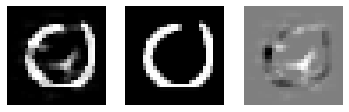

In [84]:
def plot_adversarial(inputs, adv, num):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax2.axis('off')
    ax2.imshow(inputs[0][:,:,0])
    ax1.axis('off')
    ax1.imshow(adv[0][:,:,0])
    ax3.axis('off')
    ax3.imshow(adv[0][:,:,0] - inputs[0][:,:,0])
    ax1.margins(0,0)
    ax2.margins(0,0)
    ax3.margins(0,0)
plot_adversarial(inputs_new, adv, 1)

# Four Model Attack (4 Targets)
## A: (A, A, A, A)

In [69]:
from nn_robust_attacks.l2_attack_quad_all import CarliniL2

subset = '1234_new'
adv = CarliniL2(sess, model1, model2, model3, model4).attack(inputs_new, targets_new)
save_results(inputs_new, adv, targets_new, subset)

go up to 1
tick 0


In [70]:
print_results(num_img, adv, 4, inputs)

0
Model 1 (9, 0.49651936)
Model 2 (9, 0.5004143)
Model 3 (9, 0.6404297)
Model 4 (9, 0.88020486)
None
Mean 2.85009765625
Standard Deviation 4.7561746
None
0
Model 5 (9, 0.57799894)
None


# Find One Image that Satisfies All